In [29]:
import pandas as pd

df = pd.read_csv("./data/titanic_train.csv")

'''
범주형 : 몇 개의 범주로 나누어진 자료를 의미
    명목형 : 성별, 성공여부, 혈액형 등 단순히 분류된 자료
    순서형 : 개개의 값들이 이산적이며 그들 사이에 순서 관계가 존재하는 자료
수치형 : 이산형과 연속형으로 이루어진 자료를 의미
    이산형 : 이산적인 값을 갖는 데이터로 출산횟수 등을 의미
    연속형 : 연속적인 값을 갖는 데이터로 신장, 체중 등을 의미

범주형
    명목형 : Survived, Gender, Cabin(객실), Embarked
    순서형 : Pclass
수치형
    이산형 : Age, SibSp, Parch
    연속형 : Fare
'''

df.columns.values # 헤더의 값들을 array 형식으로 불러옵니다.

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype=object)

In [24]:
df.info() 
# info() 함수는 데이터에 대한 전반적인 정보를 나타냅니다. df를 구성하는 행과 열의
# 크기, 컬럼명, 컬럼을 구성하는 값의 자료형을 출력합니다.

df.head()
# 데이터의 상위 5개의 행을 출력합니다.

df.tail()
# 데이터의 하위 5개의 행을  출력합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [25]:
df.describe()
# describe() 함수는 데이터의 컬럼별 요약 통계량을 나타냅니다.
# 또한 mean(), max(), median() 등 개별 함수를 사용하여 통계량을 게산 합니다.

# df.describe(include=["O"])
# include: 이 입력변수는 결과를 요약하기 위한 데이터 타입의 리스트를 입력받음

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
pclass_data = df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending=False)
print(pclass_data)

# as_index : 이 그룹을 인덱스로 지정할 것인지에 대한 여부
# 필드를 Pclass와 Survived를 선택하여, groupby (묶음) 을 진행 후 평균값을 냅니다.
# sort_values를 통해 정렬
# Pclass에 대한 생존율 비교

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [45]:
gender_data = df[["Gender", "Survived"]].groupby(["Gender"], as_index=False).mean().sort_values(by="Survived", ascending=False)
print(gender_data)
# 성별에 따른 생존율 비교

   Gender  Survived
0  female  0.742038
1    male  0.188908


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


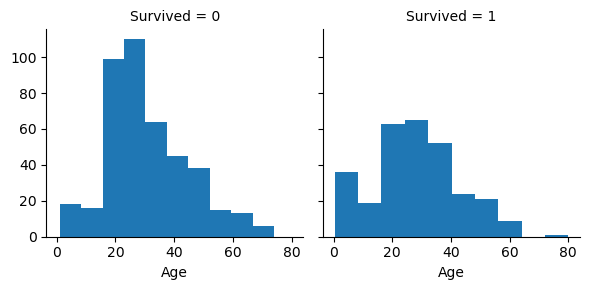

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# 열(col)을 생존 여부로 나눔
g = sns.FacetGrid(df, col="Survived")
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist, "Age", bins=10)
# 생존여부에 따른 연령 분포

In [55]:
df.shape
# 행과 열의 개수를 튜플로 반환한다.

(891, 12)

In [59]:
# 데이터 전처리

df = df.drop(["Ticket", "Cabin"], axis=1)

print(df.shape)

(891, 10)


In [66]:
# 이름의 칭호만 추출하여 Title에 저장
df["Title"]  =  df.Name.str.extract("([A-Za-z]+)\.", expand = False)

print(df["Title"])
print("\n")
print(df.shape)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object


(891, 11)


In [69]:
# 빈도표 만들기
pd.crosstab(df["Title"], df["Gender"]) 

# pandas.crosstab(index, columns, values=None, ...)
# crosstab은 범주형 변수를 기준으로 개수 파악이나
# 수치형 데이터를 넣어 계산할 때 사용한다.
pd.crosstab(index=[df["Gender"], df["Pclass"]], columns=df["Survived"])

Survived         0   1
Gender Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47